# Wheat Seeds dataset / Ionosphere dataset
---
#### Name: 劉耀文 (Yao-Wen Liu)
#### Student ID: 0716236
---

## 1. Data Input
### Import libraries and read dataset from file
#### Seeds dataset
* Use read_csv() in Pandas to read the dataset from file.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import uniform
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score as ps
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
%matplotlib inline

#read dataset
seeds_dataset = pd.read_csv("seeds_dataset.txt", sep="\t", header=None)
seeds_dataset

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


#### Ionosphere dataset
* Use read_csv() in Pandas to read the dataset from file.

In [2]:
ionosphere_dataset = pd.read_csv("ionosphere.data", sep=",", header=None)
ionosphere_dataset

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


## 2. Data Preprocessing
#### Seeds dataset
* Use Dataframe.sample(frac=1) in Pandas to shuffle the seeds dataset.

In [3]:
# Shuffle the seeds dataset
processed_seeds = seeds_dataset.sample(frac=1).reset_index(drop=True)
processed_seeds

,0,1,2,3,4,5,6,7
0,19.18,16.63,0.8717,6.369,3.681,3.357,6.229,2
1,10.59,12.41,0.8648,4.899,2.787,4.975,4.794,3
2,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,3
3,12.05,13.41,0.8416,5.267,2.847,4.988,5.046,3
4,11.56,13.31,0.8198,5.363,2.683,4.062,5.182,3
...,...,...,...,...,...,...,...,...
205,12.88,13.50,0.8879,5.139,3.119,2.352,4.607,1
206,11.27,12.86,0.8563,5.091,2.804,3.985,5.001,3
207,14.86,14.67,0.8676,5.678,3.258,2.129,5.351,1
208,18.65,16.41,0.8698,6.285,3.594,4.391,6.102,2


#### Ionosphere dataset
* Use LabelEncoder() in scikit-learn to encode the label in the ionosphere dataset to fit the model's input.
* Use Dataframe.sample(frac=1) in Pandas to shuffle the ionosphere dataset.

In [4]:
# encode label of ionosphere dataset, '0 for b' and '1 for g'
labelencoder=LabelEncoder()
ionosphere_dataset[34] = labelencoder.fit_transform(ionosphere_dataset[34])

# Shuffle the ionosphere dataset
processed_ionosphere = ionosphere_dataset.sample(frac=1).reset_index(drop=True)
processed_ionosphere

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.10976,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
1,1,0,0.66161,-1.00000,1.00000,1.00000,1.00000,-0.67321,0.80893,-0.40446,...,0.85357,1.00000,-0.08571,0.95982,-0.36250,1.00000,0.65268,1.00000,0.34732,0
2,1,0,0.88085,0.35232,0.68389,0.65128,0.34816,0.79784,0.05832,0.90842,...,-0.75533,0.17041,-0.71504,0.40675,-0.57649,0.56626,-0.36765,0.62765,-0.13305,1
3,0,0,-1.00000,1.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,-1.00000,0.00000,0.00000,0
4,1,0,0.08333,-0.20685,-1.00000,1.00000,-1.00000,1.00000,0.71875,0.47173,...,0.23810,1.00000,-1.00000,-1.00000,-0.38914,-1.00000,-1.00000,-1.00000,0.61458,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,1.00000,-0.86701,1.00000,0.22280,0.85492,-0.39896,1.00000,-0.12090,...,-0.17012,1.00000,0.35924,1.00000,-0.66494,1.00000,0.88428,1.00000,-0.18826,0
347,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0
348,1,0,0.39286,0.52381,-0.78824,0.11342,-0.16628,-0.76378,0.66667,0.01190,...,0.70238,0.51971,0.38848,0.57143,0.39286,-0.54891,-0.29915,0.25441,-0.55837,0
349,1,0,0.33333,-0.25000,0.44444,0.22222,0.38889,0.16667,0.41667,0.13889,...,0.08333,0.41543,-0.14256,0.19444,-0.13889,0.36924,-0.14809,0.08333,-0.50000,1


## 3. K-means Clustering
#### Build the assignment step and update step function for k-means clustering.

In [5]:
def assignment(seeds_X, center):
    # each data in the dataset
    for i in range(0,seeds_X.shape[0]):
        min_index = 0
        min_distance = 10000
        # each set center
        for k in range(0,3):
            distance = 0
            # each feature
            for j in range(0,7):
                distance += ((center[k][j] - seeds_X[j][i])**2)
            # if the distance from this data to the current center point is smaller than older one, them replace it
            if distance <= min_distance:
                min_index = k
                min_distance = distance
        # assign this data a set
        seeds_X['set'][i] = min_index
    return seeds_X

def update(seeds_X, center):
    for k in range(0,3):
        for i in range(0,7):
            center[k][i] = np.mean(seeds_X[seeds_X['set']==k][i])
    return center

#### The main part to use the clustering functions.

In [6]:
# Split the feature part and target part
seeds_X = processed_seeds.drop([7], axis=1)
seeds_y = processed_seeds[7]

# Randomly generate initial central points
center = {0:[], 1:[], 2:[]}
for k in range(0,3):
    for i in range(0,7):
        center[k].append(uniform(seeds_X[i].min(), seeds_X[i].max()))

# Add a new column into data to store the current set
seeds_X['set']=0
# A column to store the last set of each instance
last_label = pd.DataFrame([0]*seeds_X.shape[0])
# A column to store the final result of each instance
final_label = pd.DataFrame([0]*seeds_X.shape[0])

# Keep doing assign and update steps until the set is not modified anymore
while not seeds_X['set'].equals(last_label):
    last_label = seeds_X['set'].copy()
    seeds_X = assignment(seeds_X, center)
    center = update(seeds_X, center)

# Assign one label to each set by counting the most frequent label
# 簡單來說去計算被分到同一群的data原本的target是什麼，數到最多的就當作是這的set的label
for k in range(0,3):
    final_label[seeds_X['set']==k]=seeds_y[seeds_X['set']==k].mode()[0]

k_means_confusion_matrix = confusion_matrix(y_true=seeds_y, y_pred=final_label)
k_means_accuracy = round(accuracy_score(seeds_y, final_label)*100, 2)
k_means_recall = np.round(recall_score(seeds_y, final_label, average=None)*100, 2)
k_means_precision = np.round(ps(seeds_y, final_label, average=None)*100, 2)

# put the result into the data to show the data and its clustered result
seeds_X['result']=final_label
seeds_X

D:\Temp/ipykernel_19896/2064648667.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seeds_X['set'][i] = min_index


,0,1,2,3,4,5,6,set,result
0,19.18,16.63,0.8717,6.369,3.681,3.357,6.229,2,2
1,10.59,12.41,0.8648,4.899,2.787,4.975,4.794,1,3
2,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,1,3
3,12.05,13.41,0.8416,5.267,2.847,4.988,5.046,1,3
4,11.56,13.31,0.8198,5.363,2.683,4.062,5.182,1,3
...,...,...,...,...,...,...,...,...,...
205,12.88,13.50,0.8879,5.139,3.119,2.352,4.607,0,1
206,11.27,12.86,0.8563,5.091,2.804,3.985,5.001,1,3
207,14.86,14.67,0.8676,5.678,3.258,2.129,5.351,0,1
208,18.65,16.41,0.8698,6.285,3.594,4.391,6.102,2,2


## 4. Support Vector Machine
#### Something used by 3 kind of models

In [7]:
accuracy_list = [0] * 3
recall_list = [[0]*2] * 3
precision_list = [[0]*2] * 3
confusion_matrics = [[[0]*2]*2] * 3

### Train-Test-Split
* Use train_test_split() in scikit-learn to split the dataset into two parts, one for training, one for validation.

In [8]:
ion_X = processed_ionosphere.drop([34], axis=1).values
ion_y = processed_ionosphere[34].values
ion_x_train, ion_x_test, ion_y_train, ion_y_test = train_test_split(ion_X, ion_y, test_size=0.3)

### Construct three different models and parameter search
#### Linear Kernel
* Use SVC(kernel='linear') in scikit-learn as the training model.
* Use confusion_matrix(), accuracy_score(), recall_score() and precision_score() to evaluate the performance of the model.
    * Call precision_score() directly might cause some problem, so I use ps() to call it when I import the library.

In [9]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(ion_x_train, ion_y_train)

linear_y_predict = linear_svm.predict(ion_x_test)

confusion_matrics[0] = confusion_matrix(y_true=ion_y_test, y_pred=linear_y_predict)
accuracy_list[0] = round(accuracy_score(ion_y_test, linear_y_predict)*100, 2)
recall_list[0] = np.round(recall_score(ion_y_test, linear_y_predict, average=None)*100, 2)
precision_list[0] = np.round(ps(ion_y_test, linear_y_predict, average=None)*100, 2)

#### Polynomial kernel
* Use GridSearchCV() in scikit-learn to get the final models for each kernel with the best hyperparameter pair on the whole training set.
* Use confusion_matrix(), accuracy_score(), recall_score() and precision_score() to evaluate the performance of the model.
    * Call precision_score() directly might cause some problem, so I use ps() to call it when I import the library.
* Output .cv_results_ attribute to see the test score of each model.

In [10]:
poly_parameters = {'kernel':['poly'], 'degree':[1,2,3], 'gamma':['scale','auto', 0.001], 'coef0':[1,10,100]}
poly_svm = GridSearchCV(SVC(), poly_parameters, cv=5)
poly_svm.fit(ion_x_train, ion_y_train)

# Call predict on the estimator with the best found parameters.
poly_y_predict = poly_svm.predict(ion_x_test)

confusion_matrics[1] = confusion_matrix(y_true=ion_y_test, y_pred=poly_y_predict)
accuracy_list[1] = round(accuracy_score(ion_y_test, poly_y_predict)*100, 2)
recall_list[1] = np.round(recall_score(ion_y_test, poly_y_predict, average=None)*100, 2)
precision_list[1] = np.round(ps(ion_y_test, poly_y_predict, average=None)*100, 2)

#### RBF kernel
* Use GridSearchCV() in scikit-learn to get the final models for each kernel with the best hyperparameter pair on the whole training set.
* Use confusion_matrix(), accuracy_score(), recall_score() and precision_score() to evaluate the performance of the model.
    * Call precision_score() directly might cause some problem, so I use ps() to call it when I import the library.
* Output .cv_results_ attribute to see the test score of each model.

In [11]:
rbf_parameters = {'kernel':['rbf'], 'gamma':['scale','auto', 0.01]}
rbf_svm = GridSearchCV(SVC(), rbf_parameters, cv=5)
rbf_svm.fit(ion_x_train, ion_y_train)

# Call predict on the estimator with the best found parameters.
rbf_y_predict = rbf_svm.predict(ion_x_test)

confusion_matrics[2] = confusion_matrix(y_true=ion_y_test, y_pred=rbf_y_predict)
accuracy_list[2] = round(accuracy_score(ion_y_test, rbf_y_predict)*100, 2)
recall_list[2] = np.round(recall_score(ion_y_test, rbf_y_predict, average=None)*100, 2)
precision_list[2] = np.round(ps(ion_y_test, rbf_y_predict, average=None)*100, 2)

## 5. Results
#### K-means Clustering
* Use ConfusionMatrixDisplay() in scikit-learn to plot the confusion matrix of validation result.

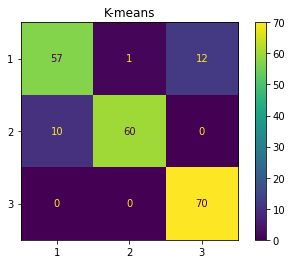

		Accuracy	Sensitivity		Precision
K-means		89.05%		[ 81.43  85.71 100.  ]%	[85.07 98.36 85.37]%


In [12]:
labels = ['1', '2', '3']

disp = ConfusionMatrixDisplay(k_means_confusion_matrix, display_labels=labels)
disp.plot()
disp.ax_.set_title('K-means')
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')

plt.show()

print("\t\tAccuracy\tSensitivity\t\tPrecision")
print('K-means' + "\t\t" + str(k_means_accuracy) + "%\t\t" 
        + str(k_means_recall) + "%\t" + str(k_means_precision) + "%")

#### Support Vector Machine
* Use ConfusionMatrixDisplay() in scikit-learn to plot the confusion matrix of validation result for each model.
* Use plt.subplots() in matplotlib to combine all the figures as one big figure.

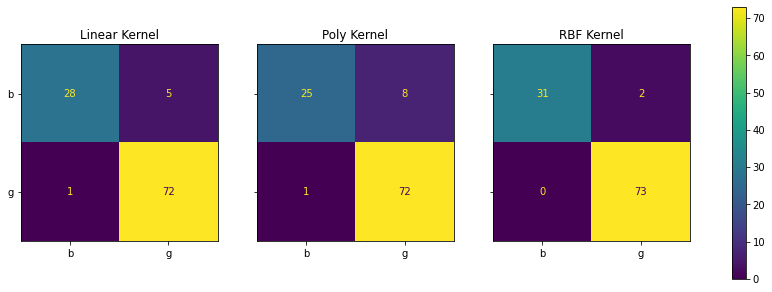

		Accuracy	Sensitivity		Precision
Linear Kernel	94.34%		[84.85 98.63]%	[96.55 93.51]%
Poly Kernel	91.51%		[75.76 98.63]%	[96.15 90.  ]%
RBF Kernel	98.11%		[ 93.94 100.  ]%	[100.    97.33]%


In [13]:
labels = ['b', 'g']
titles = ['Linear Kernel', 'Poly Kernel', 'RBF Kernel']
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharey='row')

for i in range(0,3):
    disp = ConfusionMatrixDisplay(confusion_matrics[i], display_labels=labels)
    disp.plot(ax=axes[i])
    disp.ax_.set_title(titles[i])
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    disp.ax_.set_ylabel('')

f.colorbar(disp.im_, ax=axes)
plt.show()


print("\t\tAccuracy\tSensitivity\t\tPrecision")
for i in range(0,3):
    print(titles[i] + "\t" + str(accuracy_list[i]) + "%\t\t" 
          + str(recall_list[i]) + "%\t" + str(precision_list[i]) + "%")

## 6. Comparison & Conclusion
#### K-means Clustering

* 利用簡單的L2-distance分群(K-means)方法就可以達到不錯的效果
* 不過在最一開始生成三個初始中心點時，可能會遇到所有點被分到以其中兩個點當作中心的分群，也就是說最後可能會只有兩群。

#### Support Vector Machine

* Linear kernel v.s. Polynomial kernel v.s. RBF Kernel
    * 由以上三種不同kernel所建立之模型，可以觀察到RBF kernel之performance最佳，再來是polynomial kernel，linear kernel則是三者最差。
    * RBF出來的結果會最佳，可能是因為他是radius based kernel，可以更有效的區分不同data。


* Polynomial Kernel hyperparameter
    * 以下推論為根據訓練結果所觀察。
    * 其他值固定的狀況下，Gamma值為'scale'表現最佳，'auto'其次，最差的為自己輸入之0.001。
    * 其他值固定的狀況下，degree值為2時表現最佳，為3時表現次之，最差的是跟linear相同的degree=1。
    * 其他值固定的狀況下，coef0的值為何最終表現似乎不會有太大的差異。

## 7. Questions

#### K-means Clustering
##### Choose two features to execute your K-means function and draw a scatter plot with the computed centers and the predicted label for each instance. - 10%

In [19]:
def question_assignment(seeds_X, center):
    # each data in the dataset
    for i in range(0,seeds_X.shape[0]):
        min_index = 0
        min_distance = 10000
        # each set center
        for k in range(0,3):
            distance = 0
            # each feature
            for j in range(0,2):
                distance += ((center[k][j] - seeds_X[j][i])**2)
            # if the distance from this data to the current center point is smaller than older one, them replace it
            if distance <= min_distance:
                min_index = k
                min_distance = distance
        # assign this data a set
        seeds_X['set'][i] = min_index
    return seeds_X

def question_update(seeds_X, center):
    for k in range(0,3):
        for i in range(0,2):
            center[k][i] = np.mean(seeds_X[seeds_X['set']==k][i])
    return center

D:\Temp/ipykernel_19896/2428144702.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seeds_X['set'][i] = min_index


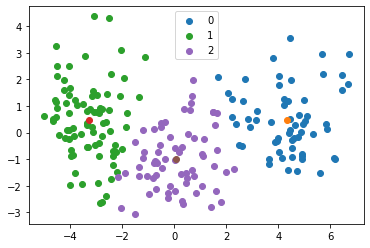

In [50]:
# drop target from the data
seeds_X_question = processed_seeds.drop([7], axis=1)

# Use PCA to reduce the dimension
pca_question = PCA(n_components=2)
pca_question.fit(seeds_X_question)
X_pca_question = pd.DataFrame(pca_question.transform(seeds_X_question))

# Randomly generate initial central points
question_center = {0:[], 1:[], 2:[]}
for k in range(0,3):
    for i in range(0,2):
        question_center[k].append(uniform(X_pca_question[i].min(), X_pca_question[i].max()))

# Add a new column into data to store the current set
X_pca_question['set']=0
# A column to store the last set of each instance
question_last_label = pd.DataFrame([0]*X_pca_question.shape[0])

# Keep doing assign and update steps until the set is not modified anymore
while not X_pca_question['set'].equals(question_last_label):
    question_last_label = X_pca_question['set'].copy()
    X_pca_question = question_assignment(X_pca_question, question_center)
    question_center = question_update(X_pca_question, question_center)

# drop the set column and turn the pandas df to np array
X_pca_question = X_pca_question.drop(['set'], axis=1).values

# scatter plot of clustered data
for i in range(0,3):
    index = np.where(question_last_label == i)
    plt.scatter(X_pca_question[index,0], X_pca_question[index,1], label=i)
    plt.scatter(question_center[i][0],question_center[i][1])
plt.legend()
plt.show()

#### Support Vector Machine
##### Show the average performance of K-fold cross-validation of parameter search in tables for each kernel. - 10%
#### Polynomial Kernel

In [14]:
poly_result = pd.DataFrame(poly_svm.cv_results_)[['param_coef0','param_degree','param_gamma','mean_test_score','rank_test_score']]
poly_result

,param_coef0,param_degree,param_gamma,mean_test_score,rank_test_score
0,1,1,scale,0.836735,14
1,1,1,auto,0.824490,18
2,1,1,0.001,0.620408,23
3,1,2,scale,0.865306,2
4,1,2,auto,0.840816,12
5,1,2,0.001,0.620408,23
6,1,3,scale,0.865306,2
7,1,3,auto,0.853061,7
8,1,3,0.001,0.620408,23
9,10,1,scale,0.836735,14


#### RBF Kernel

In [15]:
rbf_result = pd.DataFrame(rbf_svm.cv_results_)[['param_gamma','mean_test_score','rank_test_score']]
rbf_result

,param_gamma,mean_test_score,rank_test_score
0,scale,0.922449,1
1,auto,0.893878,2
2,0.01,0.844898,3
